# Kullback-Leibler for Bayesian networks

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://pyagrum.gitlab.io) |[ ![interactive online version](images/atbinder.svg)](https://mybinder.org/v2/gl/agrumery%2FaGrUM/forBinder?urlpath=%2Fdoc%2Ftree%2Fwrappers%2Fpyagrum%2Fdoc%2Fsphinx%2Fnotebooks%2F96-Tools_klForBns.ipynb)

In [1]:
%matplotlib inline

from pylab import *

## import pyagrum and pyagrum.lib.notebook (for ... notebooks :-) )

In [2]:
import pyagrum as gum
import pyagrum.lib.notebook as gnb

## Create a first BN : bn

In [3]:
bn = gum.loadBN("res/asia.bif")
# randomly re-generate parameters for every Conditional Probability Table
bn.generateCPTs()
bn

(pyagrum.BayesNet@0x966a0e400) BN{nodes: 8, arcs: 8, domainSize: 256, dim: 18, mem: 288o}

## Create a second BN : bn2

In [4]:
bn2 = gum.loadBN("res/asia.bif")
bn2.generateCPTs()
bn2

(pyagrum.BayesNet@0x966a0ea00) BN{nodes: 8, arcs: 8, domainSize: 256, dim: 18, mem: 288o}

## bn vs bn2 : different parameters

In [5]:
gnb.flow.row(bn.cpt(3), bn2.cpt(3), captions=["a CPT in bn", "same CPT in bn2 (with different parameters)"])

## Exact and (Gibbs) approximated KL-divergence 

In order to compute KL-divergence, we just need to be sure that the 2 distributions are defined on the same domain (same variables, etc.)

<h3>Exact KL</h3>


In [6]:
g1 = gum.ExactBNdistance(bn, bn2)
print(g1.compute())

{'klPQ': 2.476584381649645, 'errorPQ': 0, 'klQP': 2.244520928404808, 'errorQP': 0, 'hellinger': 0.813592705605187, 'bhattacharya': 0.4019212130892461, 'jensen-shannon': 0.4136335100698562}


If the models are not on the same domain :

In [7]:
bn_different_domain = gum.loadBN("res/alarm.dsl")

# g=gum.BruteForceKL(bn,bn_different_domain) # a KL-divergence between asia and alarm ... :(
#
# would cause
# ---------------------------------------------------------------------------
# OperationNotAllowed                       Traceback (most recent call last)
#
# OperationNotAllowed: this operation is not allowed : KL : the 2 BNs are not compatible (not the same vars : visit_to_Asia?)

<h3>Gibbs-approximated KL</h3>

In [8]:
g = gum.GibbsBNdistance(bn, bn2)
g.setVerbosity(True)
g.setMaxTime(120)
g.setBurnIn(5000)
g.setEpsilon(1e-7)
g.setPeriodSize(500)

In [9]:
print(g.compute())
print("Computed in {0} s".format(g.currentTime()))

{'klPQ': 2.475361213496724, 'errorPQ': 0, 'klQP': 2.1957241806099814, 'errorQP': 0, 'hellinger': 0.8105538873770256, 'bhattacharya': 0.3989042244816927, 'jensen-shannon': 0.411228001161747}
Computed in 1.338172 s


In [10]:
print("--")

print(g.messageApproximationScheme())
print("--")

print("Temps de calcul : {0}".format(g.currentTime()))
print("Nombre d'itérations : {0}".format(g.nbrIterations()))

--
stopped with epsilon=1e-07
--
Temps de calcul : 1.338172
Nombre d'itérations : 380500


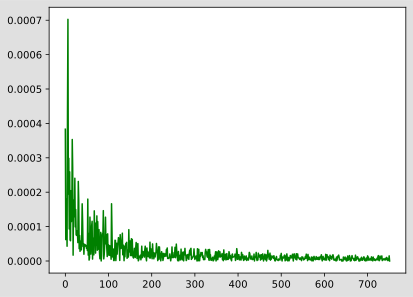

In [11]:
p = plot(g.history(), "g")

### Animation of Gibbs KL

Since it may be difficult to know what happens during approximation algorithm, pyAgrum allows to follow the iteration using animated matplotlib figure

In [12]:
g = gum.GibbsBNdistance(bn, bn2)
g.setMaxTime(60)
g.setBurnIn(500)
g.setEpsilon(1e-7)
g.setPeriodSize(5000)

{'klPQ': 2.469542051480538,
 'errorPQ': 0,
 'klQP': 2.1146518638711105,
 'errorQP': 0,
 'hellinger': 0.8035301805274394,
 'bhattacharya': 0.404240337375901,
 'jensen-shannon': 0.40444581031110494}

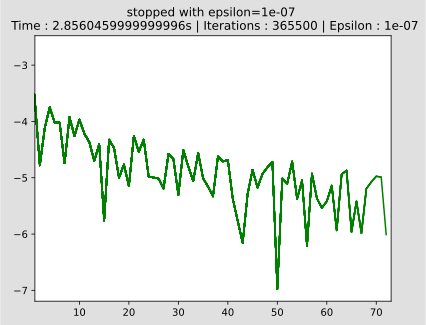

In [13]:
gnb.animApproximationScheme(g)  # logarithmique scale for Y
g.compute()